<a href="https://colab.research.google.com/github/hvakanksha/Used-Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PROJECT PRESENTATION LINK :##
https://drive.google.com/file/d/1DLvxOVZepgAbG9It4ZAGRZzt_5G9F9Dd/view?usp=share_link


## Importing Libraries

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [ ]:
df=pd.read_excel('car_price_prediction.xlsx')

In [ ]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403.0,13328.0,1399.0,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,2022-05-04 00:00:00,Left wheel,Silver,12.0
1,44731507.0,16621.0,1018.0,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,2022-05-04 00:00:00,Left wheel,Black,8.0
2,45774419.0,8467.0,-,HONDA,FIT,2006.0,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,2022-05-04 00:00:00,Right-hand drive,Black,2.0
3,45769185.0,3607.0,862.0,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,2022-05-04 00:00:00,Left wheel,White,0.0
4,45809263.0,11726.0,446.0,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,2022-05-04 00:00:00,Left wheel,Silver,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  float64
 1   Price             19237 non-null  float64
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  float64
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

## Data Preprocessing and Exploratory Data Analysis

In [ ]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
df['Levy'].value_counts()

-         5819
765.0      486
891.0      461
639.0      410
640.0      405
          ... 
3156.0       1
2908.0       1
1279.0       1
1719.0       1
1901.0       1
Name: Levy, Length: 559, dtype: int64

In [ ]:
del df['Levy']

In [ ]:
df['Mileage'].value_counts()

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
63083 km       1
28750 km       1
25077 km       1
77452 km       1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64

In [ ]:
df['Mileage']=df["Mileage"].apply(lambda x: x.split(' ')[0])
df['Mileage']=df['Mileage'].astype(int)

In [ ]:
df['Engine volume'].value_counts()

2.0          3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [ ]:
df['Engine volume']=df["Engine volume"].apply(lambda x: str(x).split(' ')[0])
df['Engine volume']=df['Engine volume'].astype(float)

In [ ]:
df['Price'].sort_values(ascending=False).head(10)

16983    26307500.0
8541       872946.0
1225       627220.0
5008       308906.0
14839      297930.0
9367       297930.0
7749       288521.0
10759      260296.0
5840       254024.0
15283      250574.0
Name: Price, dtype: float64

In [ ]:
df['Price'].sort_values(ascending=False).tail(10)

7276     3.0
14492    3.0
753      3.0
10885    3.0
14642    3.0
11636    3.0
221      3.0
4958     3.0
16992    1.0
7815     1.0
Name: Price, dtype: float64

In [ ]:
df['Price'].value_counts()

15681.0    280
470.0      274
14113.0    244
392.0      242
314.0      235
          ... 
42601.0      1
149.0        1
54349.0      1
54954.0      1
22075.0      1
Name: Price, Length: 2315, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


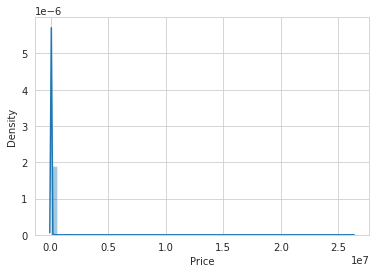

In [ ]:
sns.set_style('whitegrid')
sns.distplot(df['Price'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


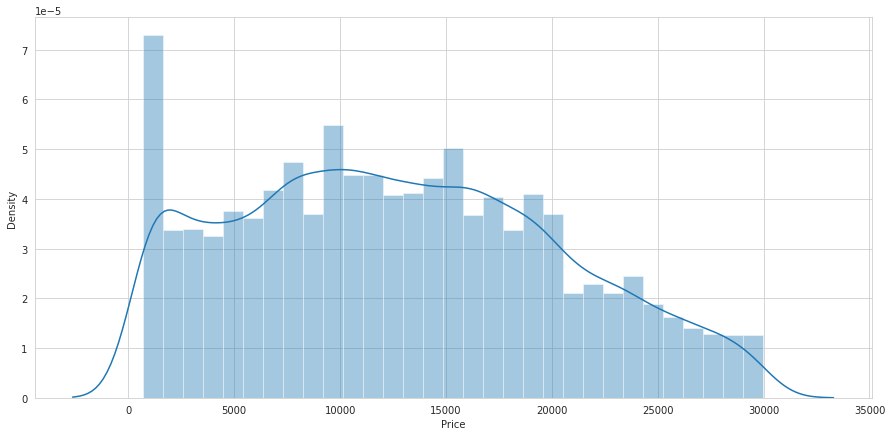

In [ ]:
fig,ag=plt.subplots(figsize=(15,7))
sns.distplot(df[(df['Price']<30000)&(df['Price']>700)]['Price'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


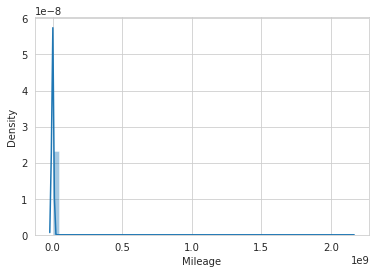

In [ ]:
sns.distplot(df['Mileage'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


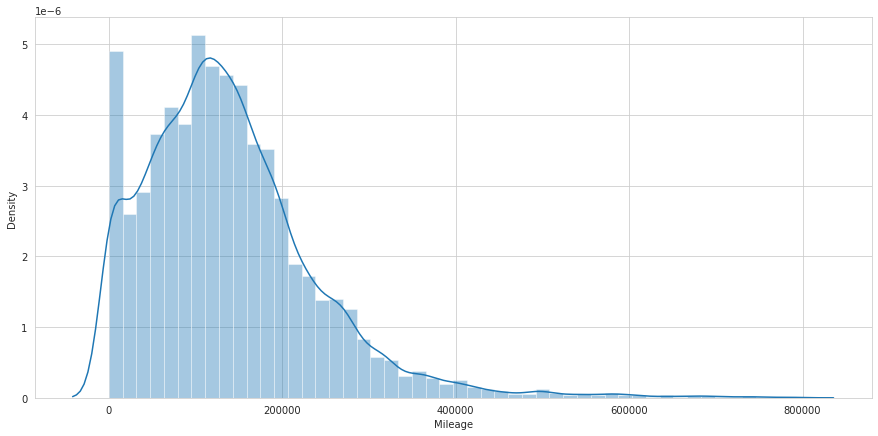

In [ ]:
fig,ag=plt.subplots(figsize=(15,7))
sns.distplot(df[df['Mileage']<800000]['Mileage'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


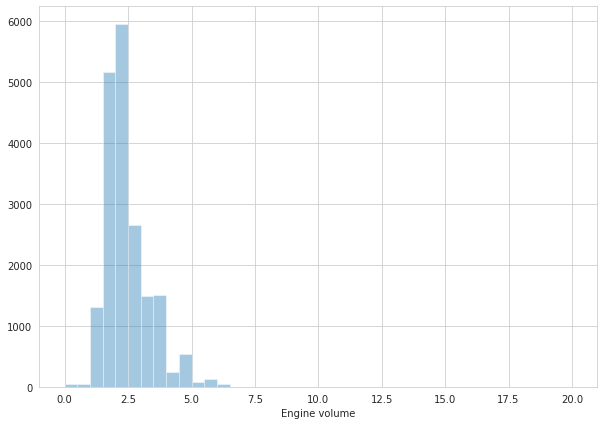

In [ ]:
fig,ag=plt.subplots(figsize=(10,7))
sns.distplot(df['Engine volume'],kde=False,bins=40)

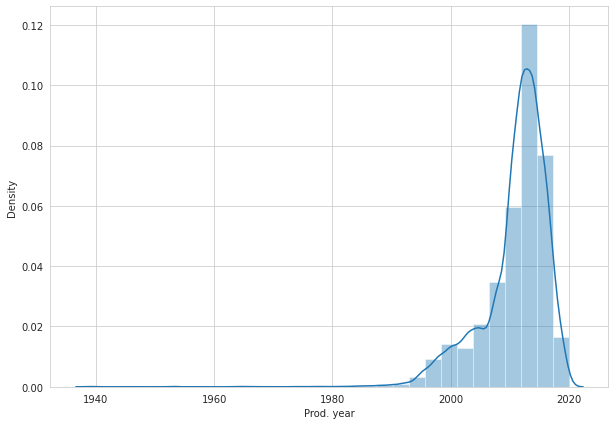

In [ ]:
fig,ag=plt.subplots(figsize=(10,7))
sns.distplot(df['Prod. year'],bins=30)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


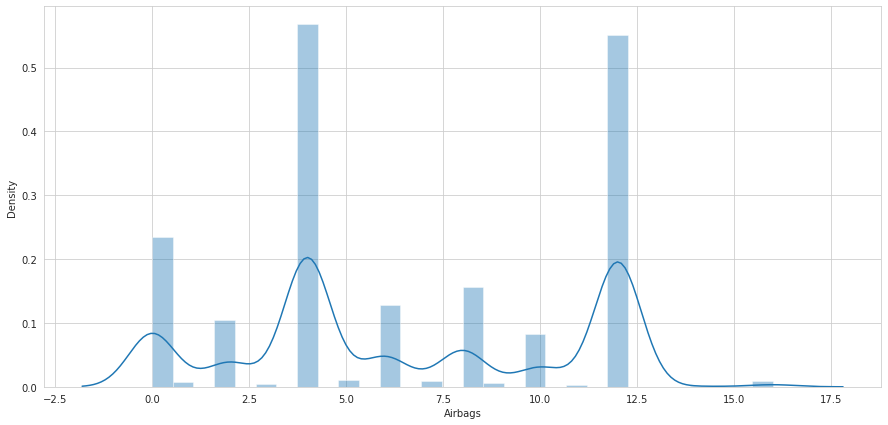

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.distplot(df['Airbags'],bins=30)

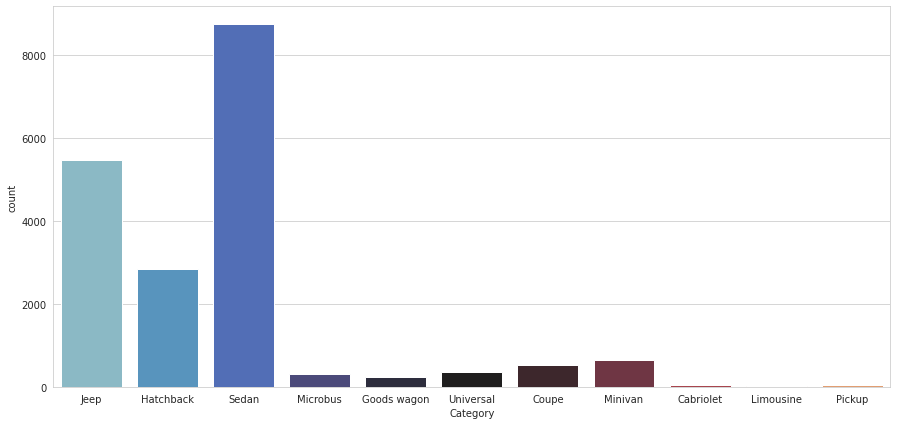

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Category',palette='icefire')

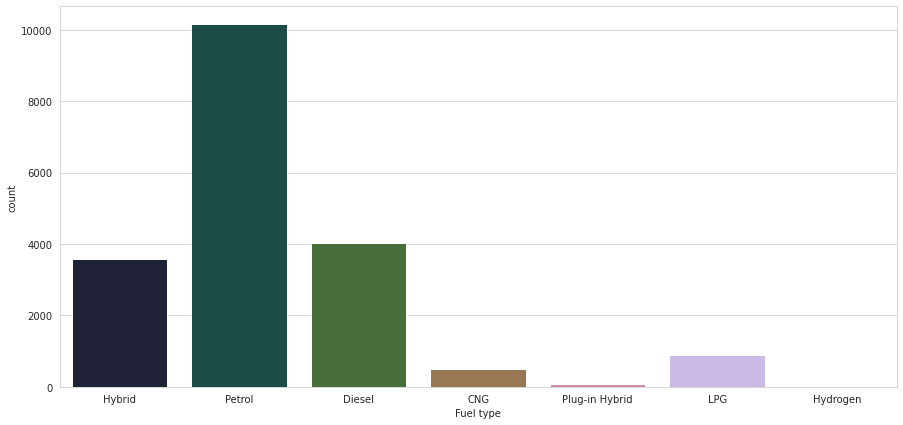

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Fuel type',palette='cubehelix')

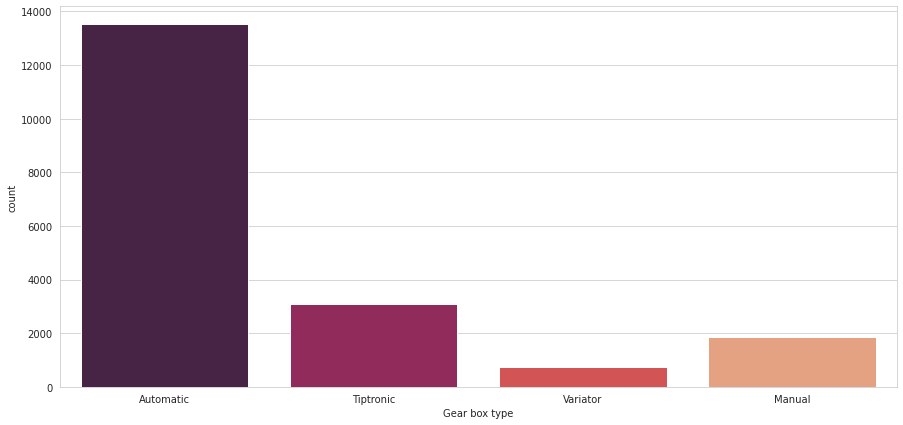

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Gear box type',palette='rocket')

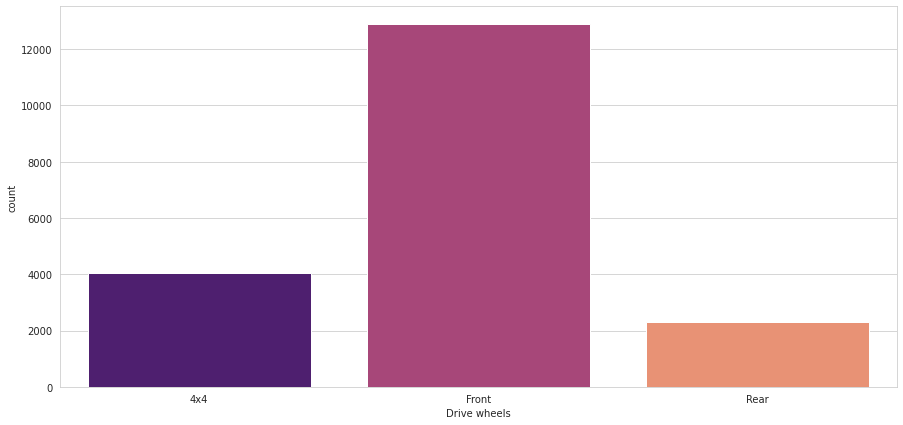

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Drive wheels',palette='magma')

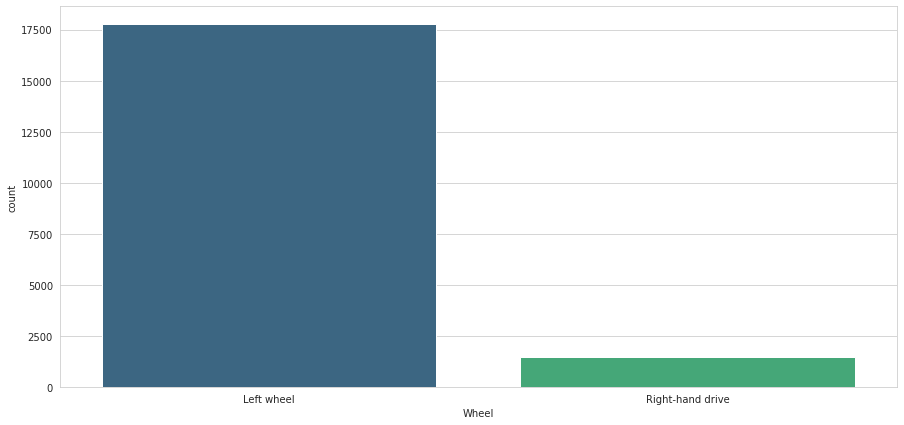

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Wheel',palette='viridis')

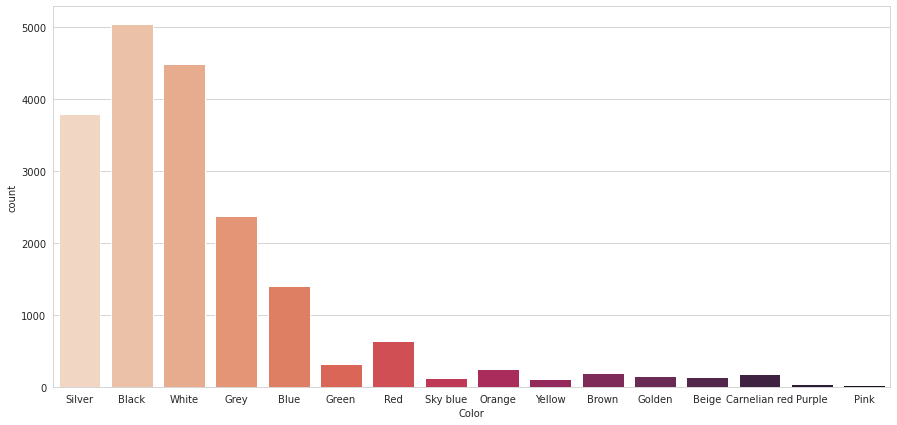

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=df,x='Color',palette='rocket_r')

In [ ]:
df_filt=df[(df['Price']<30000)&(df['Price']>700)]

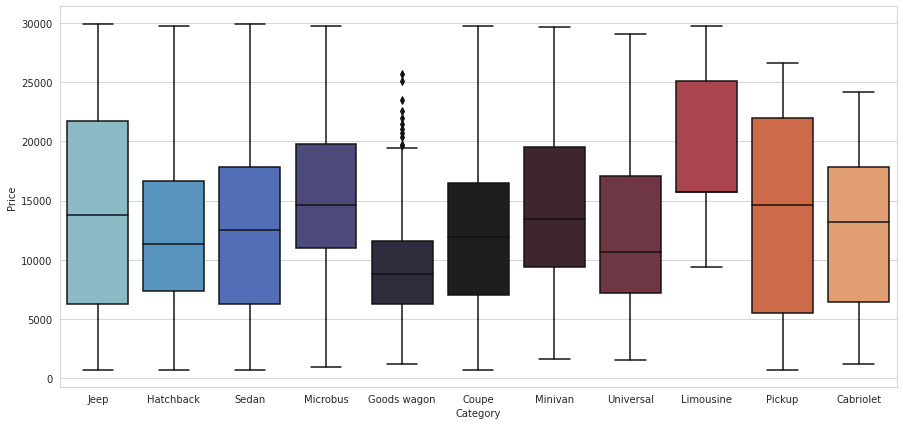

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df_filt,x='Category', y='Price',palette='icefire')

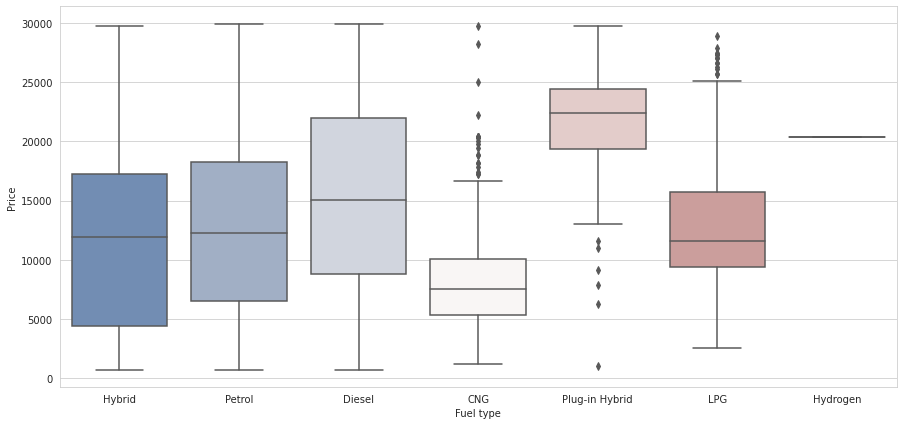

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df_filt,x='Fuel type', y='Price',palette='vlag')

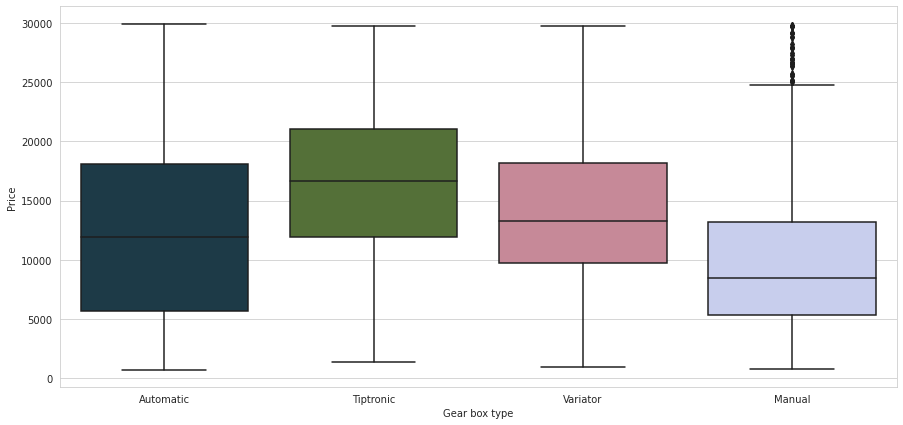

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df_filt,x='Gear box type', y='Price',palette='cubehelix')

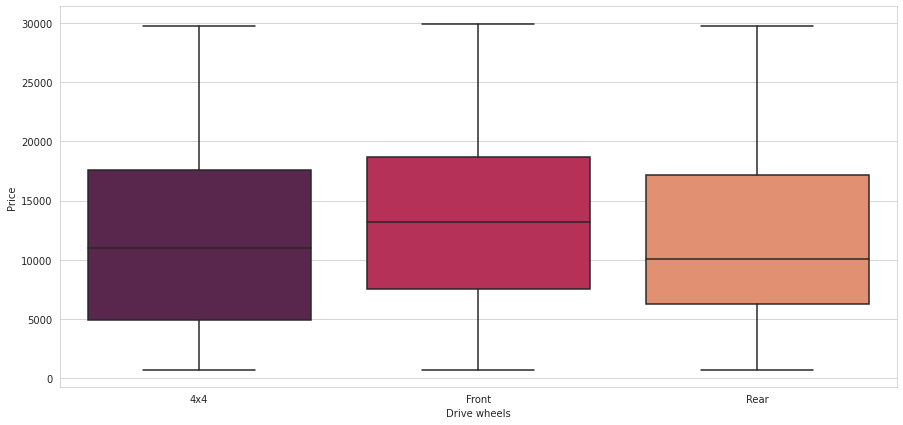

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df_filt,x='Drive wheels', y='Price',palette='rocket')

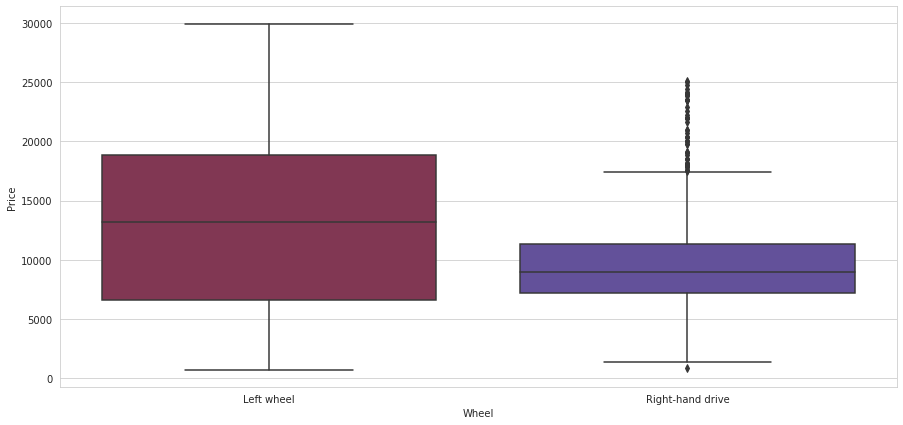

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df_filt,x='Wheel', y='Price',palette='twilight_r')

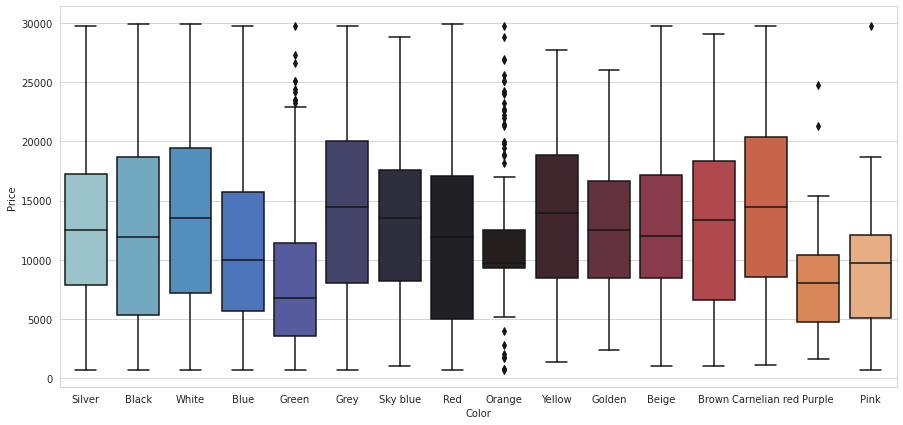

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df_filt,x='Color', y='Price',palette='icefire')

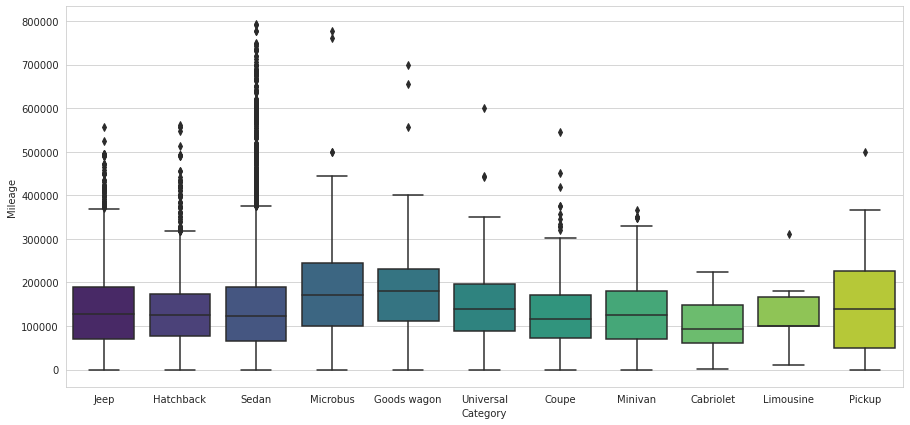

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df[df['Mileage']<800000],x='Category', y='Mileage',palette='viridis')

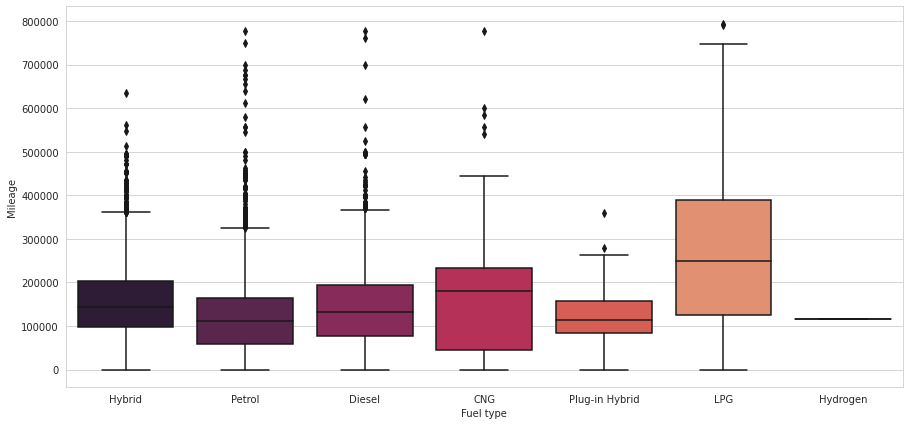

In [ ]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=df[df['Mileage']<800000],x='Fuel type', y='Mileage',palette='rocket')

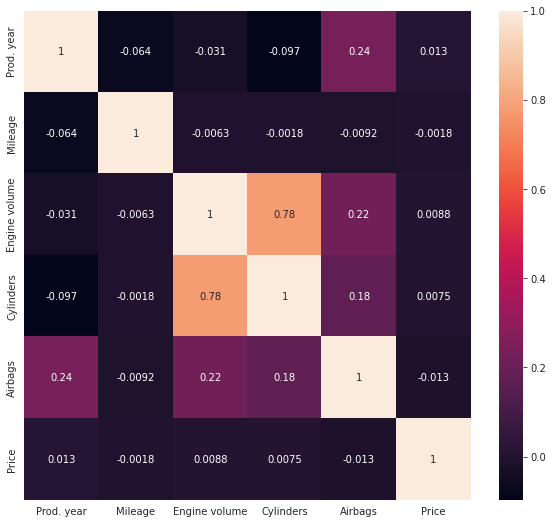

In [ ]:
num_vars = ['Prod. year', 'Mileage', 'Engine volume', 'Cylinders', 'Airbags', 'Price']
fig,ax=plt.subplots(figsize=(10,9))
sns.heatmap(df[num_vars].corr(),annot=True)

In [ ]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
def handling_outliers(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        for i in range(df.shape[0]):
            if data[col][i] < lower_bound:
                data[col][i] = lower_bound
            elif data[col][i] > upper_bound:
                data[col][i] = upper_bound
            else:
                continue
    return data
cont_d=['Price','Mileage','Engine volume']
df = handling_outliers(df, cont_d)

<ipython-input-98-546595503a9c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = upper_bound
<ipython-input-98-546595503a9c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = lower_bound


In [ ]:
def dummies(col,df):
    temp = pd.get_dummies(df[col], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([col], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df = dummies('Leather interior',df)
df = dummies('Wheel',df)
df = dummies('Drive wheels',df)
df = dummies('Gear box type',df)
df = dummies('Fuel type',df)
df = dummies('Category',df)
df = dummies('Color',df)
df = dummies('Doors',df)

In [ ]:
df.head()

,ID,Price,Manufacturer,Model,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Yes,...,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow,2022-05-04 00:00:00,>5
0,45654403.0,13328.0,LEXUS,RX 450,2010.0,3.5,186005,6.0,12.0,1,...,0,0,0,0,1,0,0,0,1,0
1,44731507.0,16621.0,CHEVROLET,Equinox,2011.0,3.0,192000,6.0,8.0,0,...,0,0,0,0,0,0,0,0,1,0
2,45774419.0,8467.0,HONDA,FIT,2006.0,1.3,200000,4.0,2.0,0,...,0,0,0,0,0,0,0,0,1,0
3,45769185.0,3607.0,FORD,Escape,2011.0,2.5,168966,4.0,0.0,1,...,0,0,0,0,0,0,1,0,1,0
4,45809263.0,11726.0,HONDA,FIT,2014.0,1.3,91901,4.0,4.0,1,...,0,0,0,0,1,0,0,0,1,0


# Train:Test=70:30

## Linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
df=df.drop(['Manufacturer','Model','ID'],axis=1)

In [ ]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,Price,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Yes,Right-hand drive,Front,Rear,...,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow,2022-05-04 00:00:00,>5
16441,0.357978,0.901235,0.446429,0.423227,0.2,0.25,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
10299,0.089701,0.962963,0.589286,0.190068,0.2,0.75,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
12492,0.945327,0.950617,0.267857,0.196359,0.2,0.25,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4365,0.156156,0.901235,0.089286,0.108651,0.2,0.25,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2456,0.445243,0.913580,0.589286,0.275297,0.2,0.75,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_train = df_train.drop('Price',axis=1)
y_train = df_train['Price']

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Prod. year', True, 1),
 ('Engine volume', False, 12),
 ('Mileage', True, 1),
 ('Cylinders', True, 1),
 ('Airbags', True, 1),
 ('Yes', False, 31),
 ('Right-hand drive', False, 4),
 ('Front', False, 11),
 ('Rear', False, 10),
 ('Manual', False, 6),
 ('Tiptronic', True, 1),
 ('Variator', False, 3),
 ('Diesel', True, 1),
 ('Hybrid', False, 8),
 ('Hydrogen', False, 13),
 ('LPG', False, 36),
 ('Petrol', False, 35),
 ('Plug-in Hybrid', True, 1),
 ('Coupe', False, 29),
 ('Goods wagon', True, 1),
 ('Hatchback', True, 1),
 ('Jeep', False, 32),
 ('Limousine', True, 1),
 ('Microbus', False, 7),
 ('Minivan', False, 30),
 ('Pickup', False, 9),
 ('Sedan', False, 2),
 ('Universal', False, 34),
 ('Black', False, 21),
 ('Blue', False, 20),
 ('Brown', False, 26),
 ('Carnelian red', False, 25),
 ('Golden', False, 28),
 ('Green', False, 23),
 ('Grey', False, 27),
 ('Orange', False, 17),
 ('Pink', False, 14),
 ('Purple', False, 5),
 ('Red', False, 18),
 ('Silver', False, 19),
 ('Sky blue', False, 33),
 (

In [ ]:
X_train.columns[rfe.support_]

Index(['Prod. year', 'Mileage', 'Cylinders', 'Airbags', 'Tiptronic', 'Diesel',
       'Plug-in Hybrid', 'Goods wagon', 'Hatchback', 'Limousine'],
      dtype='object')

In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [ ]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
X_test = df_test.drop('Price',axis=1)
y_test = df_test['Price']
X_test_new = X_test[X_train_rfe.columns]

In [ ]:
lm.fit(X_train_rfe,y_train)
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

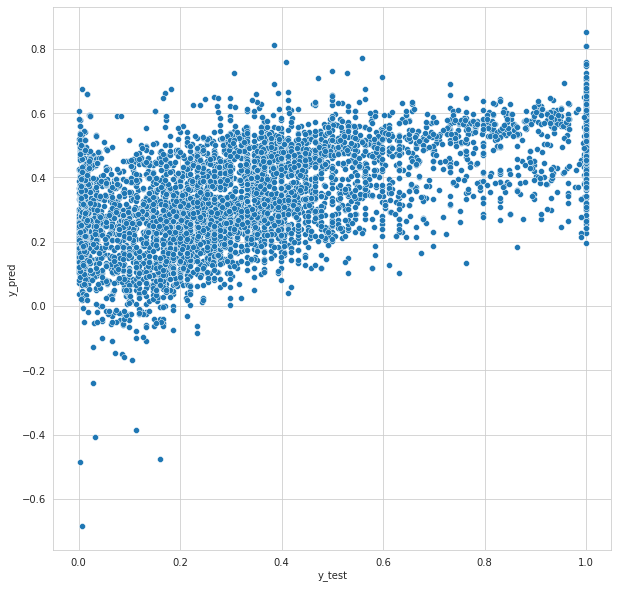

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('y_test', fontsize=10)                        
plt.ylabel('y_pred', fontsize=10)  

## Bagging and Other Algorithms

In [ ]:
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)


regressors = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb)]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(


K Nearest Neighbours : 54 %
Decision Tree : 47 %


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8

Random Forest : 74 %


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(


AdaBoost : 37 %


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(


Gradient Boosting Regressor : 73 %
[08:12:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor : 73 %


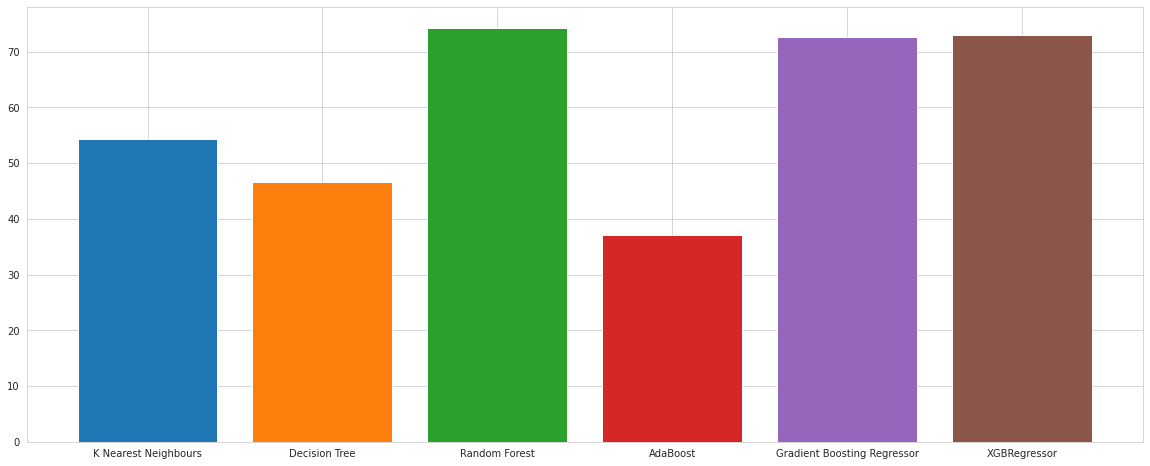

In [ ]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

## Neural Networks


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
#y_test


In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs= 200, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

181/181 [==============================] - 0s 2ms/step - loss: 0.1774 - mae: 0.1774


[0.17736214399337769, 0.17736214399337769]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(12),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs= 1500)

Epoch 1/1500
481/481 [==============================] - 2s 3ms/step - loss: 0.1950 - mse: 0.1950 - rmse: 0.2566 - mae: 0.1950
Epoch 2/1500
481/481 [==============================] - 1s 3ms/step - loss: 0.1875 - mse: 0.1875 - rmse: 0.2480 - mae: 0.1875
Epoch 3/1500
481/481 [==============================] - 1s 2ms/step - loss: 0.1865 - mse: 0.1865 - rmse: 0.2465 - mae: 0.1865
Epoch 4/1500
481/481 [==============================] - 1s 3ms/step - loss: 0.1854 - mse: 0.1854 - rmse: 0.2455 - mae: 0.1854
Epoch 5/1500
481/481 [==============================] - 1s 2ms/step - loss: 0.1847 - mse: 0.1847 - rmse: 0.2449 - mae: 0.1847
Epoch 6/1500
481/481 [==============================] - 1s 3ms/step - loss: 0.1846 - mse: 0.1846 - rmse: 0.2445 - mae: 0.1846
Epoch 7/1500
481/481 [==============================] - 1s 2ms/step - loss: 0.1839 - mse: 0.1839 - rmse: 0.2428 - mae: 0.1839
Epoch 8/1500
481/481 [==============================] - 1s 2ms/step - loss: 0.1834 - mse: 0.1834 - rmse: 0.2428 - mae:

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(12),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
421/421 [==============================] - 2s 2ms/step - loss: 0.1944 - mse: 0.1944 - rmse: 0.2554 - mae: 0.1944
Epoch 2/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1870 - mse: 0.1870 - rmse: 0.2463 - mae: 0.1870
Epoch 3/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1856 - mse: 0.1856 - rmse: 0.2455 - mae: 0.1856
Epoch 4/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1851 - mse: 0.1851 - rmse: 0.2449 - mae: 0.1851
Epoch 5/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1843 - mse: 0.1843 - rmse: 0.2438 - mae: 0.1843
Epoch 6/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1835 - mse: 0.1835 - rmse: 0.2426 - mae: 0.1835
Epoch 7/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1831 - mse: 0.1831 - rmse: 0.2420 - mae: 0.1831
Epoch 8/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1831 - mse: 0.1831 - rmse: 0.2423 - mae: 0.1831


In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(12),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs=500)

Epoch 1/500
421/421 [==============================] - 2s 2ms/step - loss: 0.1944 - mse: 0.1944 - rmse: 0.2554 - mae: 0.1944
Epoch 2/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1870 - mse: 0.1870 - rmse: 0.2463 - mae: 0.1870
Epoch 3/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1856 - mse: 0.1856 - rmse: 0.2455 - mae: 0.1856
Epoch 4/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1851 - mse: 0.1851 - rmse: 0.2449 - mae: 0.1851
Epoch 5/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1843 - mse: 0.1843 - rmse: 0.2438 - mae: 0.1843
Epoch 6/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1835 - mse: 0.1835 - rmse: 0.2426 - mae: 0.1835
Epoch 7/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1831 - mse: 0.1831 - rmse: 0.2420 - mae: 0.1831
Epoch 8/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1831 - mse: 0.1831 - rmse: 0.2423 - mae: 0.1831


In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(12),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs=200)

Epoch 1/200
421/421 [==============================] - 2s 3ms/step - loss: 0.1944 - mse: 0.1944 - rmse: 0.2554 - mae: 0.1944
Epoch 2/200
421/421 [==============================] - 1s 3ms/step - loss: 0.1870 - mse: 0.1870 - rmse: 0.2463 - mae: 0.1870
Epoch 3/200
421/421 [==============================] - 1s 3ms/step - loss: 0.1856 - mse: 0.1856 - rmse: 0.2455 - mae: 0.1856
Epoch 4/200
421/421 [==============================] - 1s 2ms/step - loss: 0.1851 - mse: 0.1851 - rmse: 0.2449 - mae: 0.1851
Epoch 5/200
421/421 [==============================] - 1s 3ms/step - loss: 0.1843 - mse: 0.1843 - rmse: 0.2438 - mae: 0.1843
Epoch 6/200
421/421 [==============================] - 2s 4ms/step - loss: 0.1835 - mse: 0.1835 - rmse: 0.2426 - mae: 0.1835
Epoch 7/200
421/421 [==============================] - 1s 3ms/step - loss: 0.1831 - mse: 0.1831 - rmse: 0.2420 - mae: 0.1831
Epoch 8/200
421/421 [==============================] - 1s 2ms/step - loss: 0.1831 - mse: 0.1831 - rmse: 0.2423 - mae: 0.1831


In [ ]:
model.evaluate(X_test, y_test)

181/181 [==============================] - 0s 2ms/step - loss: 0.1774 - mse: 0.1774 - rmse: 0.2352 - mae: 0.1774


[0.17740730941295624,
 0.17740730941295624,
 0.23518480360507965,
 0.17740730941295624]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1),
                            
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs=100)

Epoch 1/100
421/421 [==============================] - 1s 2ms/step - loss: 0.2461 - mse: 0.2461 - rmse: 0.3306 - mae: 0.2461
Epoch 2/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1916 - mse: 0.1916 - rmse: 0.2512 - mae: 0.1916
Epoch 3/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1876 - mse: 0.1876 - rmse: 0.2477 - mae: 0.1876
Epoch 4/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1859 - mse: 0.1859 - rmse: 0.2455 - mae: 0.1859
Epoch 5/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1848 - mse: 0.1848 - rmse: 0.2442 - mae: 0.1848
Epoch 6/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1840 - mse: 0.1840 - rmse: 0.2427 - mae: 0.1840
Epoch 7/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1837 - mse: 0.1837 - rmse: 0.2423 - mae: 0.1837
Epoch 8/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1830 - mse: 0.1830 - rmse: 0.2421 - mae: 0.1830


In [ ]:
model.evaluate(X_test, y_test)

181/181 [==============================] - 0s 2ms/step - loss: 0.1777 - mse: 0.1777 - rmse: 0.2359 - mae: 0.1777


[0.1776682287454605,
 0.1776682287454605,
 0.23585891723632812,
 0.1776682287454605]

In [ ]:
# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1),
                            
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs=500)

Epoch 1/500
421/421 [==============================] - 1s 2ms/step - loss: 0.2307 - mse: 0.2307 - rmse: 0.3079 - mae: 0.2307
Epoch 2/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1868 - mse: 0.1868 - rmse: 0.2461 - mae: 0.1868
Epoch 3/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1855 - mse: 0.1855 - rmse: 0.2451 - mae: 0.1855
Epoch 4/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1850 - mse: 0.1850 - rmse: 0.2440 - mae: 0.1850
Epoch 5/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1841 - mse: 0.1841 - rmse: 0.2428 - mae: 0.1841
Epoch 6/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1835 - mse: 0.1835 - rmse: 0.2419 - mae: 0.1835
Epoch 7/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1832 - mse: 0.1832 - rmse: 0.2417 - mae: 0.1832
Epoch 8/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1828 - mse: 0.1828 - rmse: 0.2418 - mae: 0.1828


In [ ]:
model.evaluate(X_test, y_test)

181/181 [==============================] - 0s 2ms/step - loss: 0.1775 - mse: 0.1775 - rmse: 0.2350 - mae: 0.1775


[0.17750729620456696,
 0.17750729620456696,
 0.23496253788471222,
 0.17750729620456696]

In [ ]:
# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(16),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1),
                            
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs=100)

Epoch 1/100
421/421 [==============================] - 1s 2ms/step - loss: 0.2160 - mse: 0.2160 - rmse: 0.2836 - mae: 0.2160
Epoch 2/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1885 - mse: 0.1885 - rmse: 0.2473 - mae: 0.1885
Epoch 3/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1864 - mse: 0.1864 - rmse: 0.2459 - mae: 0.1864
Epoch 4/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1850 - mse: 0.1850 - rmse: 0.2442 - mae: 0.1850
Epoch 5/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1840 - mse: 0.1840 - rmse: 0.2428 - mae: 0.1840
Epoch 6/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1835 - mse: 0.1835 - rmse: 0.2418 - mae: 0.1835
Epoch 7/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1828 - mse: 0.1828 - rmse: 0.2408 - mae: 0.1828
Epoch 8/100
421/421 [==============================] - 1s 2ms/step - loss: 0.1828 - mse: 0.1828 - rmse: 0.2417 - mae: 0.1828


In [ ]:
model.evaluate(X_test, y_test)

181/181 [==============================] - 1s 2ms/step - loss: 0.1779 - mse: 0.1779 - rmse: 0.2366 - mae: 0.1779


[0.17789874970912933,
 0.17789874970912933,
 0.23655851185321808,
 0.17789874970912933]

In [ ]:
# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(16),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1),
                            
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs=200)

Epoch 1/200
421/421 [==============================] - 2s 3ms/step - loss: 0.2669 - mse: 0.2669 - rmse: 0.3694 - mae: 0.2669
Epoch 2/200
421/421 [==============================] - 1s 2ms/step - loss: 0.1906 - mse: 0.1906 - rmse: 0.2496 - mae: 0.1906
Epoch 3/200
421/421 [==============================] - 1s 2ms/step - loss: 0.1879 - mse: 0.1879 - rmse: 0.2476 - mae: 0.1879
Epoch 4/200
421/421 [==============================] - 1s 2ms/step - loss: 0.1867 - mse: 0.1867 - rmse: 0.2463 - mae: 0.1867
Epoch 5/200
421/421 [==============================] - 1s 2ms/step - loss: 0.1856 - mse: 0.1856 - rmse: 0.2445 - mae: 0.1856
Epoch 6/200
421/421 [==============================] - 1s 2ms/step - loss: 0.1845 - mse: 0.1845 - rmse: 0.2432 - mae: 0.1845
Epoch 7/200
421/421 [==============================] - 1s 2ms/step - loss: 0.1838 - mse: 0.1838 - rmse: 0.2421 - mae: 0.1838
Epoch 8/200
421/421 [==============================] - 1s 2ms/step - loss: 0.1839 - mse: 0.1839 - rmse: 0.2429 - mae: 0.1839


In [ ]:
model.evaluate(X_test, y_test)

181/181 [==============================] - 0s 2ms/step - loss: 0.1774 - mse: 0.1774 - rmse: 0.2356 - mae: 0.1774


[0.1774093359708786,
 0.1774093359708786,
 0.23561178147792816,
 0.1774093359708786]

In [ ]:
# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(16),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1),
                            
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs=500)

Epoch 1/500
421/421 [==============================] - 1s 2ms/step - loss: 0.2379 - mse: 0.2379 - rmse: 0.3275 - mae: 0.2379
Epoch 2/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1878 - mse: 0.1878 - rmse: 0.2481 - mae: 0.1878
Epoch 3/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1864 - mse: 0.1864 - rmse: 0.2467 - mae: 0.1864
Epoch 4/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1861 - mse: 0.1861 - rmse: 0.2460 - mae: 0.1861
Epoch 5/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1854 - mse: 0.1854 - rmse: 0.2451 - mae: 0.1854
Epoch 6/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1847 - mse: 0.1847 - rmse: 0.2438 - mae: 0.1847
Epoch 7/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1843 - mse: 0.1843 - rmse: 0.2434 - mae: 0.1843
Epoch 8/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1839 - mse: 0.1839 - rmse: 0.2436 - mae: 0.1839


In [ ]:
model.evaluate(X_test, y_test)

181/181 [==============================] - 1s 2ms/step - loss: 0.1775 - mse: 0.1775 - rmse: 0.2348 - mae: 0.1775


[0.1774790734052658,
 0.1774790734052658,
 0.2348179668188095,
 0.1774790734052658]

In [ ]:
# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(13),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1),
                            
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs=500)

Epoch 1/500
421/421 [==============================] - 1s 2ms/step - loss: 0.2622 - mse: 0.2622 - rmse: 0.3819 - mae: 0.2622
Epoch 2/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1915 - mse: 0.1915 - rmse: 0.2532 - mae: 0.1915
Epoch 3/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1893 - mse: 0.1893 - rmse: 0.2507 - mae: 0.1893
Epoch 4/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1882 - mse: 0.1882 - rmse: 0.2487 - mae: 0.1882
Epoch 5/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1875 - mse: 0.1875 - rmse: 0.2475 - mae: 0.1875
Epoch 6/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1865 - mse: 0.1865 - rmse: 0.2462 - mae: 0.1865
Epoch 7/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1858 - mse: 0.1858 - rmse: 0.2452 - mae: 0.1858
Epoch 8/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1851 - mse: 0.1851 - rmse: 0.2451 - mae: 0.1851


In [ ]:
model.evaluate(X_test, y_test)

181/181 [==============================] - 0s 2ms/step - loss: 0.1775 - mse: 0.1775 - rmse: 0.2354 - mae: 0.1775


[0.17753589153289795,
 0.17753589153289795,
 0.23535564541816711,
 0.17753589153289795]

In [ ]:
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(14),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1),
                            
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs=500)

Epoch 1/500
421/421 [==============================] - 2s 3ms/step - loss: 0.2315 - mse: 0.2315 - rmse: 0.3164 - mae: 0.2315
Epoch 2/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1887 - mse: 0.1887 - rmse: 0.2498 - mae: 0.1887
Epoch 3/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1868 - mse: 0.1868 - rmse: 0.2477 - mae: 0.1868
Epoch 4/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1864 - mse: 0.1864 - rmse: 0.2467 - mae: 0.1864
Epoch 5/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1857 - mse: 0.1857 - rmse: 0.2455 - mae: 0.1857
Epoch 6/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1851 - mse: 0.1851 - rmse: 0.2447 - mae: 0.1851
Epoch 7/500
421/421 [==============================] - 1s 2ms/step - loss: 0.1846 - mse: 0.1846 - rmse: 0.2441 - mae: 0.1846
Epoch 8/500
421/421 [==============================] - 1s 3ms/step - loss: 0.1843 - mse: 0.1843 - rmse: 0.2443 - mae: 0.1843


In [ ]:
model.evaluate(X_test, y_test)

181/181 [==============================] - 0s 2ms/step - loss: 0.1775 - mse: 0.1775 - rmse: 0.2349 - mae: 0.1775


[0.17750215530395508,
 0.17750215530395508,
 0.2349126636981964,
 0.17750215530395508]

# Train:Test=80:20

##Linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
X_train = df_train.drop('Price',axis=1)
y_train = df_train['Price']

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Prod. year', True, 1),
 ('Engine volume', False, 13),
 ('Mileage', True, 1),
 ('Cylinders', True, 1),
 ('Airbags', True, 1),
 ('Yes', False, 31),
 ('Right-hand drive', False, 4),
 ('Front', False, 11),
 ('Rear', False, 9),
 ('Manual', False, 7),
 ('Tiptronic', True, 1),
 ('Variator', False, 3),
 ('Diesel', True, 1),
 ('Hybrid', False, 6),
 ('Hydrogen', False, 10),
 ('LPG', False, 34),
 ('Petrol', False, 33),
 ('Plug-in Hybrid', True, 1),
 ('Coupe', False, 12),
 ('Goods wagon', True, 1),
 ('Hatchback', True, 1),
 ('Jeep', False, 29),
 ('Limousine', True, 1),
 ('Microbus', False, 8),
 ('Minivan', False, 27),
 ('Pickup', False, 32),
 ('Sedan', False, 2),
 ('Universal', False, 36),
 ('Black', False, 20),
 ('Blue', False, 19),
 ('Brown', False, 23),
 ('Carnelian red', False, 25),
 ('Golden', False, 30),
 ('Green', False, 22),
 ('Grey', False, 24),
 ('Orange', False, 16),
 ('Pink', False, 15),
 ('Purple', False, 5),
 ('Red', False, 17),
 ('Silver', False, 18),
 ('Sky blue', False, 35),
 (

In [ ]:
X_train.columns[rfe.support_]

Index(['Prod. year', 'Mileage', 'Cylinders', 'Airbags', 'Tiptronic', 'Diesel',
       'Plug-in Hybrid', 'Goods wagon', 'Hatchback', 'Limousine'],
      dtype='object')

In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [ ]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
X_test = df_test.drop('Price',axis=1)
y_test = df_test['Price']
X_test_new = X_test[X_train_rfe.columns]

In [ ]:
lm.fit(X_train_rfe,y_train)
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

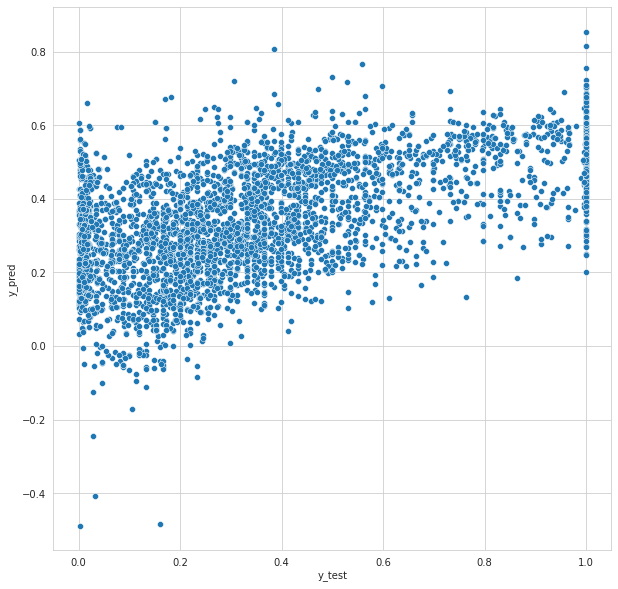

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('y_test', fontsize=10)                        
plt.ylabel('y_pred', fontsize=10)  

##Boosting and Other Algorithms

In [ ]:
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)


regressors = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb)]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(


K Nearest Neighbours : 56 %
Decision Tree : 47 %


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8

Random Forest : 75 %


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(


AdaBoost : 37 %


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(


Gradient Boosting Regressor : 74 %
[11:50:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor : 74 %


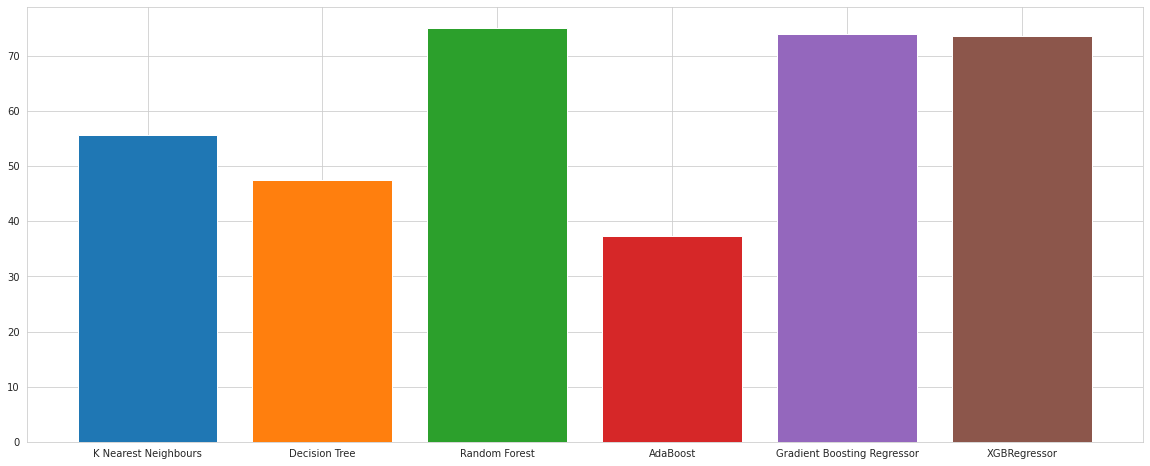

In [ ]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

##Bagging

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
import sklearn.metrics as metrics

In [ ]:
clf = BaggingRegressor(n_estimators = 200,
                       max_samples = 0.8,
                       random_state = 42)

In [ ]:
p = clf.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
mae = metrics.mean_absolute_error(y_test,p.predict(X_test))
mae

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.08449245715341457

##Neural Networks

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs= 500, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

121/121 [==============================] - 0s 2ms/step - loss: 0.1760 - mae: 0.1760


[0.1760053187608719, 0.1760053187608719]

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(12),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs= 1500)

Epoch 1/1500
481/481 [==============================] - 2s 2ms/step - loss: 0.1950 - mse: 0.1950 - rmse: 0.2566 - mae: 0.1950
Epoch 2/1500
481/481 [==============================] - 2s 4ms/step - loss: 0.1875 - mse: 0.1875 - rmse: 0.2480 - mae: 0.1875
Epoch 3/1500
481/481 [==============================] - 2s 5ms/step - loss: 0.1865 - mse: 0.1865 - rmse: 0.2465 - mae: 0.1865
Epoch 4/1500
481/481 [==============================] - 1s 2ms/step - loss: 0.1854 - mse: 0.1854 - rmse: 0.2455 - mae: 0.1854
Epoch 5/1500
481/481 [==============================] - 1s 2ms/step - loss: 0.1847 - mse: 0.1847 - rmse: 0.2449 - mae: 0.1847
Epoch 6/1500
481/481 [==============================] - 1s 2ms/step - loss: 0.1846 - mse: 0.1846 - rmse: 0.2445 - mae: 0.1846
Epoch 7/1500
481/481 [==============================] - 1s 2ms/step - loss: 0.1839 - mse: 0.1839 - rmse: 0.2428 - mae: 0.1839
Epoch 8/1500
481/481 [==============================] - 1s 2ms/step - loss: 0.1834 - mse: 0.1834 - rmse: 0.2428 - mae:

In [ ]:
model.evaluate(X_test, y_test)

121/121 [==============================] - 0s 2ms/step - loss: 0.1758 - mse: 0.1758 - rmse: 0.2323 - mae: 0.1758


[0.17581826448440552,
 0.17581826448440552,
 0.23229598999023438,
 0.17581826448440552]

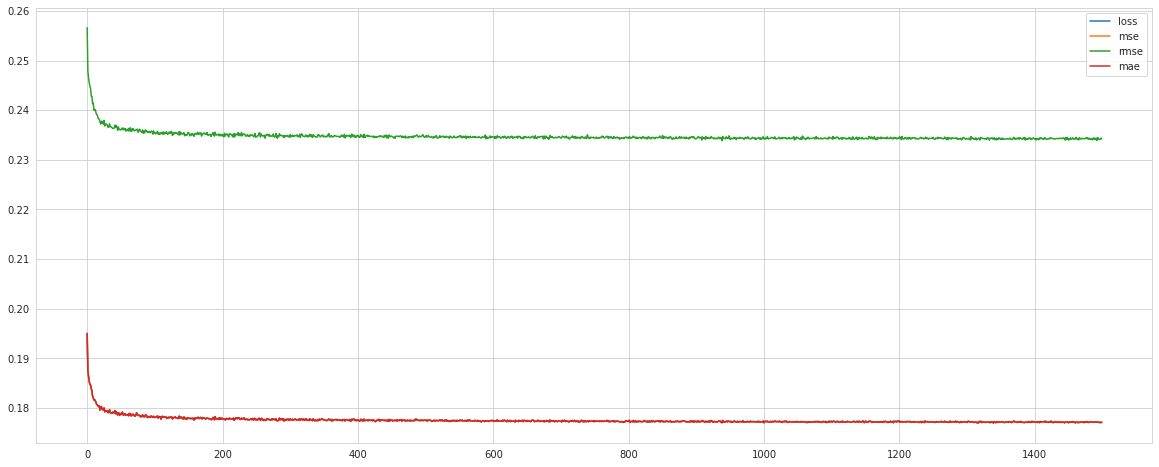

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(16),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1),
                            
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs=500)

Epoch 1/500
481/481 [==============================] - 1s 2ms/step - loss: 0.2074 - mse: 0.2074 - rmse: 0.2736 - mae: 0.2074
Epoch 2/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1896 - mse: 0.1896 - rmse: 0.2500 - mae: 0.1896
Epoch 3/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1878 - mse: 0.1878 - rmse: 0.2477 - mae: 0.1878
Epoch 4/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1864 - mse: 0.1864 - rmse: 0.2465 - mae: 0.1864
Epoch 5/500
481/481 [==============================] - 1s 3ms/step - loss: 0.1857 - mse: 0.1857 - rmse: 0.2459 - mae: 0.1857
Epoch 6/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1852 - mse: 0.1852 - rmse: 0.2451 - mae: 0.1852
Epoch 7/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1848 - mse: 0.1848 - rmse: 0.2438 - mae: 0.1848
Epoch 8/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1837 - mse: 0.1837 - rmse: 0.2430 - mae: 0.1837


In [ ]:
model.evaluate(X_test, y_test)

121/121 [==============================] - 1s 3ms/step - loss: 0.1759 - mse: 0.1759 - rmse: 0.2320 - mae: 0.1759


[0.1758832037448883,
 0.1758832037448883,
 0.23201467096805573,
 0.1758832037448883]

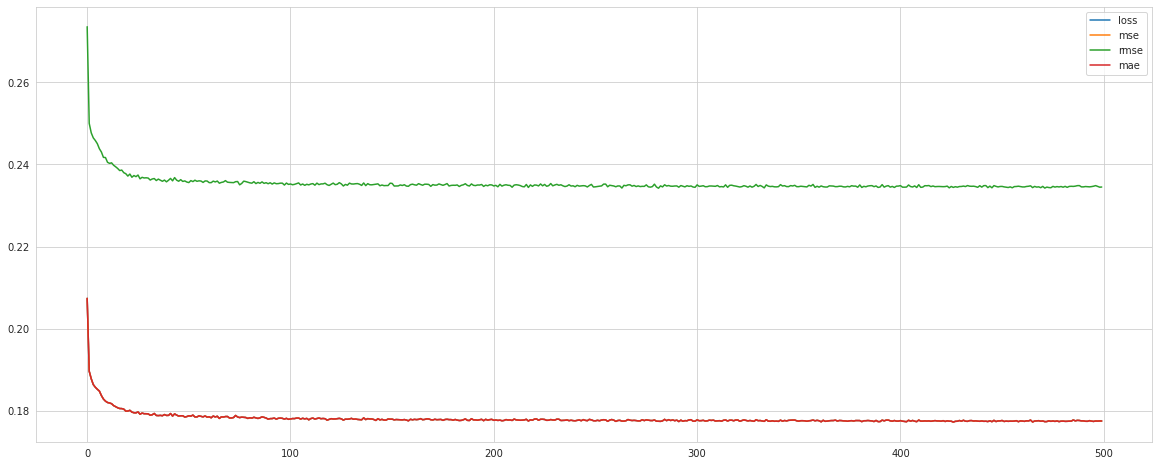

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(13),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1),
                            
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs=500)

Epoch 1/500
481/481 [==============================] - 3s 3ms/step - loss: 0.2057 - mse: 0.2057 - rmse: 0.2730 - mae: 0.2057
Epoch 2/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1870 - mse: 0.1870 - rmse: 0.2483 - mae: 0.1870
Epoch 3/500
481/481 [==============================] - 1s 3ms/step - loss: 0.1857 - mse: 0.1857 - rmse: 0.2460 - mae: 0.1857
Epoch 4/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1846 - mse: 0.1846 - rmse: 0.2446 - mae: 0.1846
Epoch 5/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1841 - mse: 0.1841 - rmse: 0.2441 - mae: 0.1841
Epoch 6/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1838 - mse: 0.1838 - rmse: 0.2436 - mae: 0.1838
Epoch 7/500
481/481 [==============================] - 2s 3ms/step - loss: 0.1832 - mse: 0.1832 - rmse: 0.2421 - mae: 0.1832
Epoch 8/500
481/481 [==============================] - 2s 3ms/step - loss: 0.1825 - mse: 0.1825 - rmse: 0.2419 - mae: 0.1825


In [ ]:
model.evaluate(X_test, y_test)

121/121 [==============================] - 0s 2ms/step - loss: 0.1761 - mse: 0.1761 - rmse: 0.2316 - mae: 0.1761


[0.17610874772071838,
 0.17610874772071838,
 0.2316160649061203,
 0.17610874772071838]

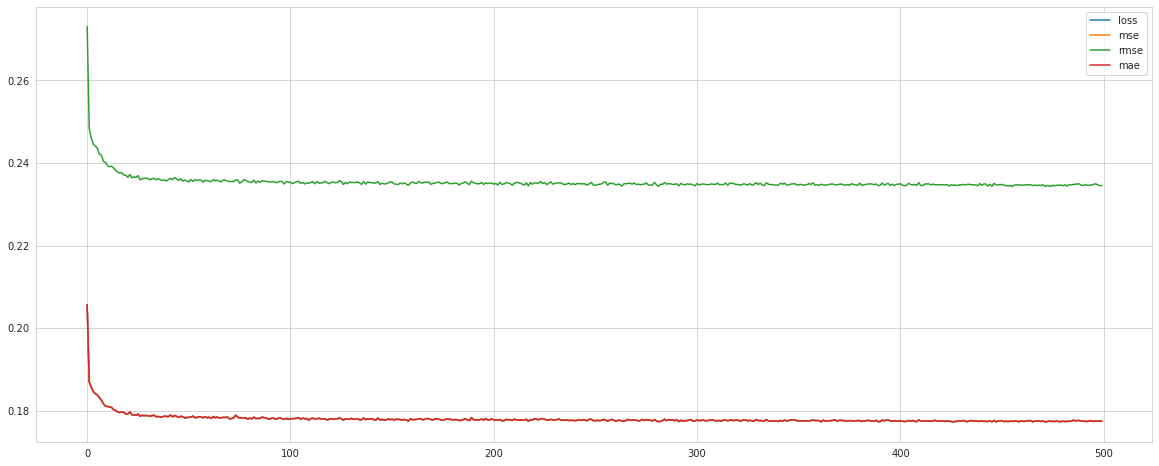

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(14),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1),
                            
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs=500)

Epoch 1/500
481/481 [==============================] - 2s 2ms/step - loss: 0.2048 - mse: 0.2048 - rmse: 0.2679 - mae: 0.2048
Epoch 2/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1885 - mse: 0.1885 - rmse: 0.2487 - mae: 0.1885
Epoch 3/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1874 - mse: 0.1874 - rmse: 0.2474 - mae: 0.1874
Epoch 4/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1866 - mse: 0.1866 - rmse: 0.2469 - mae: 0.1866
Epoch 5/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1858 - mse: 0.1858 - rmse: 0.2464 - mae: 0.1858
Epoch 6/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1856 - mse: 0.1856 - rmse: 0.2458 - mae: 0.1856
Epoch 7/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1849 - mse: 0.1849 - rmse: 0.2446 - mae: 0.1849
Epoch 8/500
481/481 [==============================] - 2s 4ms/step - loss: 0.1842 - mse: 0.1842 - rmse: 0.2442 - mae: 0.1842


In [ ]:
model.evaluate(X_test, y_test)

121/121 [==============================] - 0s 1ms/step - loss: 0.1759 - mse: 0.1759 - rmse: 0.2322 - mae: 0.1759


[0.17585335671901703,
 0.17585335671901703,
 0.23216243088245392,
 0.17585335671901703]

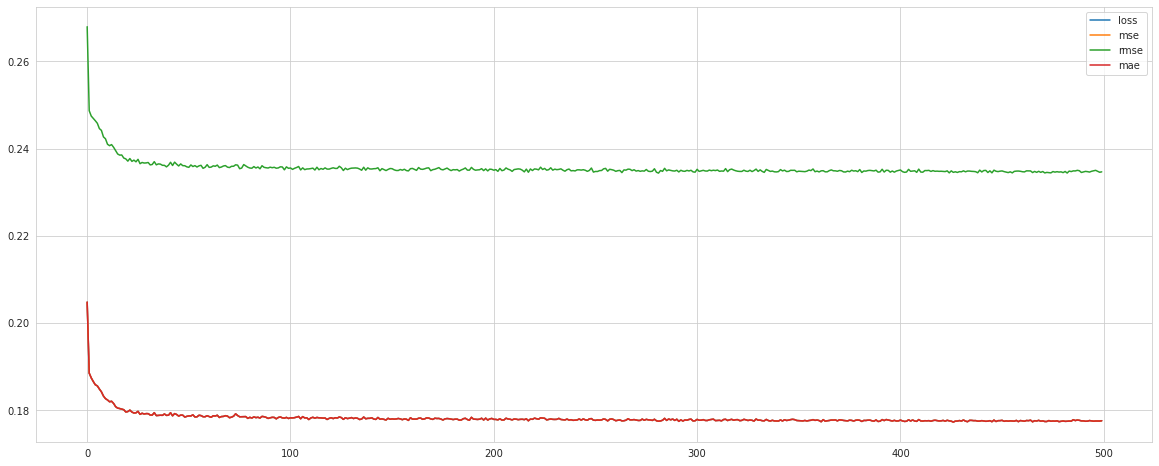

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(13),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1),
                            
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs=500)

Epoch 1/500
481/481 [==============================] - 2s 2ms/step - loss: 0.2317 - mse: 0.2317 - rmse: 0.3171 - mae: 0.2317
Epoch 2/500
481/481 [==============================] - 2s 4ms/step - loss: 0.1884 - mse: 0.1884 - rmse: 0.2474 - mae: 0.1884
Epoch 3/500
481/481 [==============================] - 3s 6ms/step - loss: 0.1864 - mse: 0.1864 - rmse: 0.2458 - mae: 0.1864
Epoch 4/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1852 - mse: 0.1852 - rmse: 0.2450 - mae: 0.1852
Epoch 5/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1848 - mse: 0.1848 - rmse: 0.2447 - mae: 0.1848
Epoch 6/500
481/481 [==============================] - 2s 4ms/step - loss: 0.1844 - mse: 0.1844 - rmse: 0.2441 - mae: 0.1844
Epoch 7/500
481/481 [==============================] - 2s 5ms/step - loss: 0.1841 - mse: 0.1841 - rmse: 0.2428 - mae: 0.1841
Epoch 8/500
481/481 [==============================] - 2s 4ms/step - loss: 0.1833 - mse: 0.1833 - rmse: 0.2426 - mae: 0.1833


In [ ]:
model.evaluate(X_test, y_test)

121/121 [==============================] - 0s 2ms/step - loss: 0.1760 - mse: 0.1760 - rmse: 0.2317 - mae: 0.1760


[0.17603667080402374,
 0.17603667080402374,
 0.2316702902317047,
 0.17603667080402374]

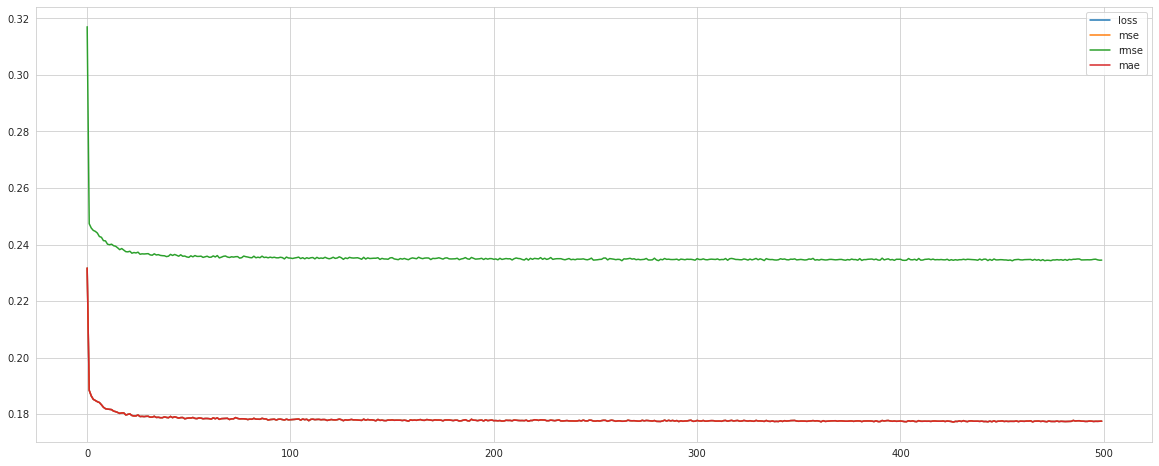

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1),
                            
])

# STEP2: Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= [tf.keras.metrics.MeanAbsoluteError(name='mse'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
            
# STEP3: Fit the model

history= model.fit(X_train, y_train, epochs=500)

Epoch 1/500
481/481 [==============================] - 2s 3ms/step - loss: 0.2404 - mse: 0.2404 - rmse: 0.3222 - mae: 0.2404
Epoch 2/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1915 - mse: 0.1915 - rmse: 0.2523 - mae: 0.1915
Epoch 3/500
481/481 [==============================] - 1s 3ms/step - loss: 0.1882 - mse: 0.1882 - rmse: 0.2483 - mae: 0.1882
Epoch 4/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1860 - mse: 0.1860 - rmse: 0.2460 - mae: 0.1860
Epoch 5/500
481/481 [==============================] - 1s 3ms/step - loss: 0.1852 - mse: 0.1852 - rmse: 0.2454 - mae: 0.1852
Epoch 6/500
481/481 [==============================] - 1s 3ms/step - loss: 0.1847 - mse: 0.1847 - rmse: 0.2446 - mae: 0.1847
Epoch 7/500
481/481 [==============================] - 1s 2ms/step - loss: 0.1842 - mse: 0.1842 - rmse: 0.2433 - mae: 0.1842
Epoch 8/500
481/481 [==============================] - 1s 3ms/step - loss: 0.1834 - mse: 0.1834 - rmse: 0.2427 - mae: 0.1834


In [ ]:
model.evaluate(X_test, y_test)

121/121 [==============================] - 0s 2ms/step - loss: 0.1760 - mse: 0.1760 - rmse: 0.2316 - mae: 0.1760


[0.1760053187608719,
 0.1760053187608719,
 0.23163779079914093,
 0.1760053187608719]

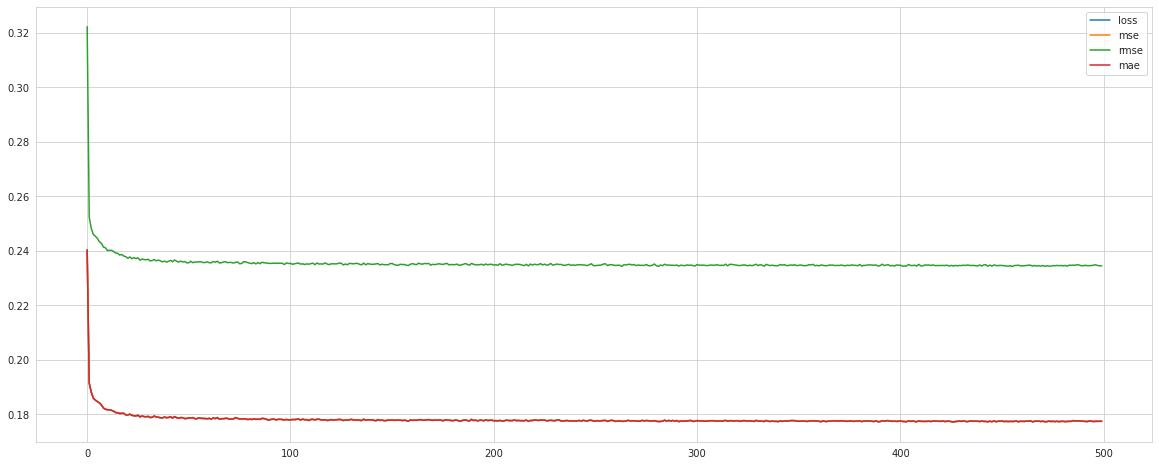

In [ ]:
pd.DataFrame(history.history).plot()